#[14주차 실습_1] - 유튜브 인기 채널 및 영상 분석

# 인기 채널 순위 시각화 - 환경 설정 (라이브러리, 폰트, 데이터)

##1. 한글 폰트 설치 및 적용

###1.1 런타임 다시시작 Ctrl-M

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

##2. 한글 폰트 설치 테스트

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 

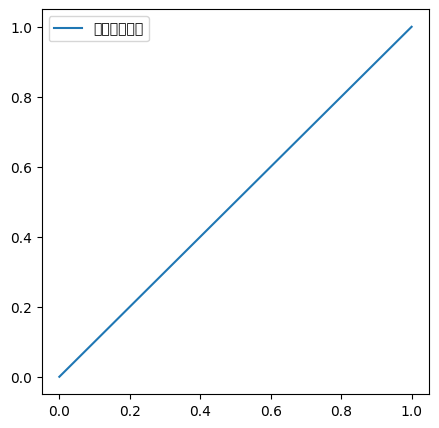

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

##3. Warning 출력 무시

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##4. 라이브러리 import

In [ ]:
import pandas as pd
import seaborn as sns

##5. 데이터 가져오기 - 세션저장소에 업로드
<!-- https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download -->

# 인기 채널 순위 시각화 - 데이터 구조 파악 및 정리

## 데이터 불러오기

###1. pandas로 데이터 불러오기 (engine="python", error_bad_lines="false")

In [ ]:
# 1. euc-kr
try:
    df = pd.read_csv("KRvideos.csv", encoding='euc-kr')
except Exception as e:
    print("euc-kr 에러:", e)

# 2. cp949
try:
    df = pd.read_csv("KRvideos.csv", encoding='cp949')
except Exception as e:
    print("cp949 에러:", e)

# 3. utf-8-sig
try:
    df = pd.read_csv("KRvideos.csv", encoding='utf-8-sig')
except Exception as e:
    print("utf-8-sig 에러:", e)

euc-kr 에러: 'euc_kr' codec can't decode byte 0x8b in position 217: illegal multibyte sequence
cp949 에러: 'cp949' codec can't decode byte 0xec in position 232: illegal multibyte sequence
utf-8-sig 에러: 'utf-8' codec can't decode bytes in position 261291-261292: invalid continuation byte


In [ ]:
import pandas as pd

with open("KRvideos.csv", encoding='utf-8', errors='ignore') as f:
    KRvideo = pd.read_csv(f)

## 데이터 구조 파악하기

###1. row, column 수 파악하기

In [ ]:
KRvideo.shape

(34567, 16)

###2. 결측 값 확인

In [ ]:
KRvideo.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

###3. 전체 데이터 구조 파악하기

In [ ]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


## 데이터 정리하기

###1. 필요한 칼럼만 추리기



In [ ]:
df = KRvideo[['title','channel_title','views']]

###2. view 내림차순 정렬 하기

In [ ]:
df_sorted = df.sort_values(by='views', ascending=False)
df_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4678,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
3750,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319
...,...,...,...
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
17414,애슐리 18년도 딸기축제 영상❣,ashley wow,2919
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


###3. 중복 제거 (MAX만 남김)

In [ ]:
df_drop_sorted = df_sorted.drop_duplicates(['title','channel_title'],keep="first")

###4. 중복된 row는 몇개였을까?

In [ ]:
len(df_sorted) - len(df_drop_sorted)

18138

###5. 중복 제거된 것 확인하기

In [ ]:
df_drop_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
28554,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600
26391,VENOM - Official Trailer (HD),Sony Pictures Entertainment,49185287
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),jungbub2013,3509
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


# 인기 채널 순위 시각화 - seaborn을 활용한 데이터 시각화

##1. 조회수 기준 TOP 100 채널 순위 조회

####채널별 조회수 합계

In [ ]:
df_chanel_view_sum = df_drop_sorted.groupby(df['channel_title']).sum()
df_chanel_view_sum

,title,channel_title,views
channel_title,,,
! 세상에 무슨일이,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,1052789
!t Live,Micon Interview_ EXO 엑소 : EXO PLANET #4 - The ...,!t Live!t Live!t Live,194690
# 정국적으로 뷔가내릴슈가,[가요대축제/방탄소년단] 방탄 대기실 (ft.매일 듣는 노래) / 아미 사랑해요 /...,# 정국적으로 뷔가내릴슈가,21698
#Drama Planet,박보영 오늘 집에 안들어간단 말에 사례들린 박형식 (무슨 생각을...( ͡° ͜ʖ ...,#Drama Planet#Drama Planet,112340
#tae_tae,BTS GAYO EPISODE 11 ENG SUBS,#tae_tae,122499
...,...,...,...
힙합 스페이스 (HIPHOP SPACE),워너원 스타라이브 대화 원본 (앞부분),힙합 스페이스 (HIPHOP SPACE),482755
힙합 좋아하는여자,박재범한테 하이어뮤직 면접 보는 김하온 ㅋㅋㅋㅋㅋㅋㅋ이병재가 살이 안 빠지는 이유 ...,힙합 좋아하는여자힙합 좋아하는여자힙합 좋아하는여자힙합 좋아하는여자,833951
힙합 플레이어 _,[고등래퍼 2] 김하온 X 이병재(빈첸),힙합 플레이어 _,79585


####정렬

In [ ]:
df_chanel_view = df_chanel_view_sum.sort_values(by='views', ascending=False)
df_chanel_view

,title,channel_title,views
channel_title,,,
ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MVBTS (방탄소년단)...,ibighitibighitibighitibighitibighitibighitibig...,187757328
Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel EntertainmentMarvel EntertainmentMarvel...,174161670
jypentertainment,TWICE What is Love? M/VTWICE Heart Shaker M/VG...,jypentertainmentjypentertainmentjypentertainme...,118541123
YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
MLG Highlights,Cleveland Cavaliers vs Boston Celtics Full Gam...,MLG HighlightsMLG HighlightsMLG HighlightsMLG ...,78061767
...,...,...,...
메이플스토리2 MSG TV,메이플스토리2 – 메이플월드는지금22# 스카이포트리스#한번더무기주문서#1만자악보#신...,메이플스토리2 MSG TV,3954
IfreeMusic,원피스 895화 - 해적 루피 vs 장성 카타쿠리 - one piece 895,IfreeMusic,3725
여름감기 from OSW,다니엘 생일 축하해!,여름감기 from OSW,3268


###TOP 100만 뽑기

In [ ]:
df_chanel_view = df_chanel_view[:100]
df_chanel_view

,title,channel_title,views
channel_title,,,
ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MVBTS (방탄소년단)...,ibighitibighitibighitibighitibighitibighitibig...,187757328
Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel EntertainmentMarvel EntertainmentMarvel...,174161670
jypentertainment,TWICE What is Love? M/VTWICE Heart Shaker M/VG...,jypentertainmentjypentertainmentjypentertainme...,118541123
YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
MLG Highlights,Cleveland Cavaliers vs Boston Celtics Full Gam...,MLG HighlightsMLG HighlightsMLG HighlightsMLG ...,78061767
...,...,...,...
[Dorothy]도로시,매운비빔국수 먹방 캡사이신 중국당면 청양고추mukbang Hot spicy Bibi...,[Dorothy]도로시[Dorothy]도로시[Dorothy]도로시[Dorothy]도...,11275375
필름에빠지다,모태솔로 남자가 타임머신을 활용하는 방법마약왕이 만든 모든 욕구를 풀수있는 천국 교...,필름에빠지다필름에빠지다필름에빠지다필름에빠지다필름에빠지다필름에빠지다필름에빠지다필름에빠...,11174308
The Late Show with Stephen Colbert,LSSC Full Uncut Interview: James ComeyStephen ...,The Late Show with Stephen ColbertThe Late Sho...,11157085


###reset_index()

##2. seaborn barplot 사용하여 TOP 100 채널 데이터 시각화

<Axes: xlabel='channel_title', ylabel='views'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

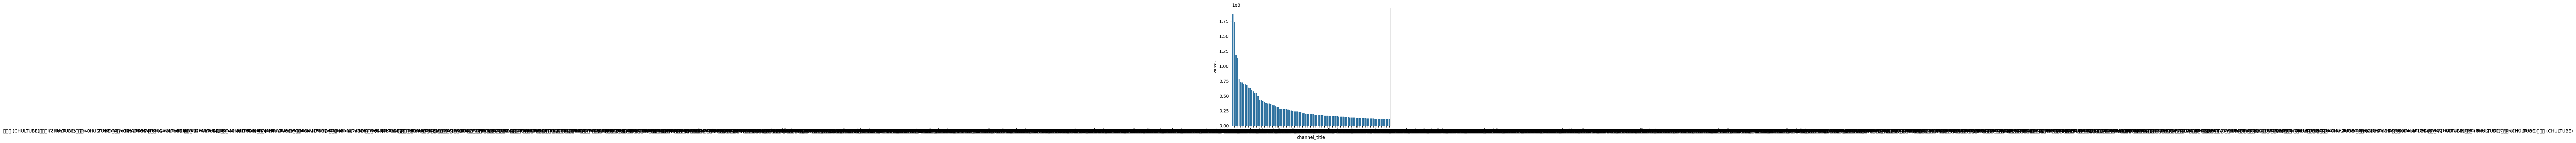

In [ ]:
sns.barplot(x='channel_title', y='views', data=df_chanel_view)

##3. 사이즈 (20*100) 및 축 조정

In [ ]:
plt.figure(figsize=(20,100))
sns.barplot(x='views', y='channel_title', data=df_chanel_view[:100])

<Axes: xlabel='views', ylabel='channel_title'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

# 인기 영상 키워드 분석하기 - 제목 추출 및 정제하기

###1. 데이터 조회

In [ ]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


###2. 제목, 뷰만 가져오고 뷰 많은 순으로 정렬 후 중복 제거

In [ ]:
df = KRvideo[['title','views']]
df_sorted = df.sort_values(by="views", ascending=False).drop_duplicates(['title'], keep="first")
df_sorted

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [ ]:
df_hot = df_sorted
df_hot

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


###3. 제목 Array로 조회

In [ ]:
df_hot['title'].values

array(['YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
       "Marvel Studios' Avengers: Infinity War Official Trailer",
       "BTS (방탄소년단) 'FAKE LOVE' Official MV", ...,
       '[홍익인간 인성교육] 7128강 산에 들어가고 싶다',
       '만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그', '소셜 잠금화면 앱 (달고나)'],
      shape=(16353,), dtype=object)

###4. 정규표현식(re)로 한글 데이터만 남기기 (한글,띄어쓰기 포함)

In [ ]:
import re
df_hot['title_refined'] = df_hot['title'].apply(lambda x: re.sub('[^가-힣\s]', '', x))
df_hot

,title,views,title_refined
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
28554,Childish Gambino - This Is America (Official V...,73432600,
26391,VENOM - Official Trailer (HD),49185287,
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


###5. 공백만 있는 row는 삭제

In [ ]:
df_hot = df_hot[df_hot['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x)) != '']
df_hot

,title,views,title_refined
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


# 인기 영상 키워드 분석하기 - 제목 단어 추출 및 빈도 수 구하기

###1. soynlp 설치

###2. WordExtractor로 단어 점수 학습

In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=10,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)
word_extractor.train(df_hot['title_refined'].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 1.043 Gb
all cohesion probabilities was computed. # words = 4814
all branching entropies was computed # words = 15729
all accessor variety was computed # words = 15729


{'슛': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.232643284498737, right_branching_entropy=-0.0, left_accessor_variety=4, right_accessor_variety=1, leftside_frequency=25, rightside_frequency=0),
 '택': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.3421131789144003, right_branching_entropy=1.271577672448969, left_accessor_variety=4, right_accessor_variety=6, leftside_frequency=29, rightside_frequency=46),
 '복': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.9812380595967753, right_branching_entropy=1.5131465211967492, left_accessor_variety=22, right_accessor_variety=7, leftside_frequency=118, rightside_frequency=49),
 '님': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.3406392473856588, right_branching_entropy=3.4069886323410175, left_accessor_variety=4, right_accessor_variety=41, leftside_frequency=0, rightside_frequency=247),
 '샷': Scores(cohesion_forward=0, cohesion_backward=0, 

###3. LTokenizer로 L-R 분리

In [ ]:
from soynlp.tokenizer import LTokenizer
cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

###4. 제목 데이터 중 L만 남기기

In [ ]:
df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
df_hot

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,"[홍익인간, 인성교육, 강, 해외, 증가]"
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,"[다니엘, 생일, 축하]"
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,"[홍익인간, 인성교육, 강, 산에, 들어, 싶다]"
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,"[만취, 브이로그, 생일, 파티, 현실, 술판여자셋, 일상]"


# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

###1. 인기 영상 (50만 조회수 이상)

In [ ]:
df_hot_top = df_hot[df_sorted['views'] > 500000]
df_hot_top

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
32727,"중딩 커플의 키스, 친구들한텐 비밀인 이유 [진짜사랑 리턴즈2 11-1]",502090,중딩 커플의 키스 친구들한텐 비밀인 이유 진짜사랑 리턴즈,"[중딩, 커플, 키스, 친구, 비밀, 이유, 진짜, 리턴즈]"
3876,"문 대통령, JSA 장병 초청... '명예 소령' 이국종 교수도 참석/비디오머그",501508,문 대통령 장병 초청 명예 소령 이국종 교수도 참석비디오머그,"[문, 대통령, 장병, 초청, 명예, 소령, 이국종, 교수, 참석]"
11219,윤식당2 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,501469,윤식당 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,"[윤식당, 방문, 우크라이나, 블로거가, 공개, 비하인드, 및, 인터뷰]"
20576,"♥좋아싫어해♥(スキキライ) 태쁘 & 엔찬 커플송! (커버송, Cover) [Pre...",500972,좋아싫어해 태쁘 엔찬 커플송 커버송 쁘띠허브,"[좋아, 태쁘, 엔찬, 커플, 커버, 쁘띠허브]"


###2. tokenized 단어 한 배열에 담기

In [ ]:
words = []
for i in df_hot_top['tokenized'].values:
  for k in i:
    words.append(k)
words

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '레드벨벳',
 '백일몽',
 '방탄소년단',
 '방탄소년단',
 '여자친구',
 '밤',
 '방탄소년단',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '방탄소년단',
 '워너원',
 '약속',
 '선미',
 '주인공',
 '워너원',
 '부메랑',
 '엑소',
 '종현',
 '빈소',
 '방탄소년단',
 '등',
 '애도',
 '이어져',
 '샤이니',
 '종현',
 '빛이',
 '나',
 '워너원',
 '켜줘',
 '종현',
 '발인',
 '음악에',
 '열정',
 '넘쳤던',
 '가수',
 '영면동료들',
 '마지막',
 '길',
 '눈물',
 '배웅',
 '샤이니',
 '빙글뱅글',
 '워너원',
 '사랑을',
 '했다',
 '샤이니',
 '데리',
 '가',
 '텔레콤',
 '연아와',
 '성빈이의',
 '이야기',
 '현아',
 '방예담',
 '프리',
 '배틀',
 '시간',
 '능력',
 '가진',
 '남자',
 '여성에게',
 '한',
 '행동',
 '방탄소년단',
 '샤이니',
 '종현',
 '빈소',
 '찾은',
 '소녀시대',
 '써니',
 '멈추',
 '않는',
 '눈물',
 '동영상',
 '단독',
 '조현민',
 '에이',
 '폭언',
 '음성',
 '공개',
 '방탄소년단',
 '방탄',
 '꽃',
 '길',
 '직캠',
 '트와이스',
 '직캠',
 '김정은',
 '웃게',
 '한',
 '제주',
 '오연준의',
 '바람',
 '불어오는',
 '곳비디오머그',
 '내',
 '여자친구',
 '개',
 '쩌는듯',
 '엔시티',
 '드림',
 '아내',
 '낯선사람',
 '차에',
 '태우면',
 '안되는',
 '이유',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '여자',
 '시청자',
 '빵터',
 '선수들',
 '대화',
 '이엑스아이디',
 '내일',
 '뮤직',
 '비디오',
 '가요대축제',
 '방탄소년단',
 '병맛더빙',
 '급식',
 '콜롬비아나',

### Counter로 words 빈도 수 파악하기

In [ ]:
from collections import Counter
count = Counter(words)
words_dict = dict(count)
print(words_dict)

{'방탄소년단': 50, '레드벨벳': 17, '백일몽': 1, '여자친구': 17, '밤': 4, '피카부': 5, '워너원': 10, '약속': 3, '선미': 3, '주인공': 2, '부메랑': 1, '엑소': 2, '종현': 36, '빈소': 10, '등': 5, '애도': 1, '이어져': 1, '샤이니': 22, '빛이': 1, '나': 2, '켜줘': 1, '발인': 5, '음악에': 1, '열정': 1, '넘쳤던': 1, '가수': 2, '영면동료들': 1, '마지막': 14, '길': 3, '눈물': 21, '배웅': 3, '빙글뱅글': 2, '사랑을': 5, '했다': 7, '데리': 3, '가': 3, '텔레콤': 1, '연아와': 1, '성빈이의': 1, '이야기': 13, '현아': 1, '방예담': 2, '프리': 2, '배틀': 3, '시간': 11, '능력': 2, '가진': 2, '남자': 18, '여성에게': 1, '한': 17, '행동': 3, '찾은': 2, '소녀시대': 5, '써니': 1, '멈추': 2, '않는': 2, '동영상': 3, '단독': 3, '조현민': 4, '에이': 3, '폭언': 1, '음성': 4, '공개': 15, '방탄': 4, '꽃': 4, '직캠': 21, '트와이스': 11, '김정은': 15, '웃게': 1, '제주': 5, '오연준의': 1, '바람': 4, '불어오는': 3, '곳비디오머그': 1, '내': 7, '개': 7, '쩌는듯': 1, '엔시티': 3, '드림': 1, '아내': 10, '낯선사람': 1, '차에': 1, '태우면': 1, '안되는': 9, '이유': 51, '여자': 31, '시청자': 3, '빵터': 4, '선수들': 5, '대화': 1, '이엑스아이디': 1, '내일': 3, '뮤직': 2, '비디오': 1, '가요대축제': 2, '병맛더빙': 5, '급식': 3, '콜롬비아나': 1, '김성태': 9, '빡친': 4, '손석희': 4, '결국': 6, '

# 인기 영상 키워드 분석하기 - 워드 클라우드 그리기

### wordcloud 폰트 설정 및 생성하기

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', background_color='white', width=500, height=500).generate_from_frequencies(words_dict)

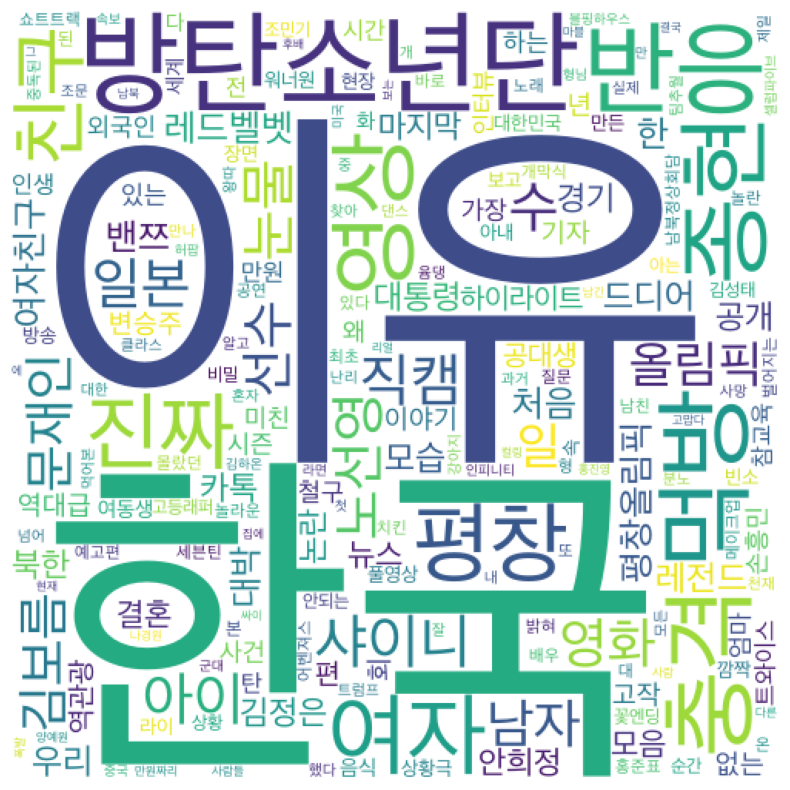

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### StopWord 설정 후 다시 보기

In [ ]:
stopwords = {'수','한','일','온','화'}
for word in stopwords:
  words_dict.pop(word)